
# Iris Classification with k-Nearest Neighbors (KNN)

This notebook demonstrates a complete **end-to-end classification workflow** on the classic Iris dataset using a k-Nearest Neighbors (KNN) classifier:

- Data loading and inspection  
- Exploratory data analysis (EDA) with basic plots  
- Train–test split and model training  
- Model evaluation (accuracy, confusion matrix, classification report)  
- Hyperparameter analysis (varying `k`)  
- 2D decision boundary visualization



> **Note:** This notebook requires the `mglearn` package.  
> Install it once in your environment with:  
> `pip install mglearn`


In [1]:
# Core libraries
import numpy as np              # Numerical computing library for array manipulation and mathematical functions
import pandas as pd             # Data manipulation and analysis library for handling dataframes and series
import matplotlib.pyplot as plt # Plotting library for creating static, animated, and interactive visualizations

# Scikit-learn: dataset, model, train/test split, evaluation metrics
from sklearn.datasets import load_iris                # Load the Iris dataset for classification tasks
from sklearn.model_selection import train_test_split  # Function to split datasets into training and testing sets
from sklearn.neighbors import KNeighborsClassifier    # K-Nearest Neighbors classifier algorithm for classification tasks
# Evaluation metrics for classification models
from sklearn.metrics import (  
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)                                                      

# Helper plotting library from the book "Introduction to Machine Learning with Python"
import mglearn

# Make plots appear inline in the notebook
%matplotlib inline

In [2]:
# Load the iris dataset (a classic small classification dataset)
iris_dataset = load_iris()

# Check the type of the dataset
print("1- Type of iris_dataset:", type(iris_dataset), "\n")

# Show the keys of the Bunch object
print("2- Keys of iris_dataset:", iris_dataset.keys(), "\n")

# Feature and target names
print("3- Target names:", iris_dataset['target_names'], "\n")
print("4- Feature names:", iris_dataset['feature_names'], "\n")

# Check the shape of the data matrix (n_samples, n_features)
print("5- Type of data:", type(iris_dataset['data']), "\n")
print("6- Shape of data:", iris_dataset['data'].shape, "\n")

# Show the first 5 samples (rows) of the features
print("7- First five rows of data:")
print(iris_dataset['data'][:5], "\n")

# Look at the target array
print("8- Type of target:", type(iris_dataset['target']), "\n")
print("9- Shape of target:", iris_dataset['target'].shape, "\n")
print("10- Target values (first 120):", iris_dataset['target'][:120], "\n")

1- Type of iris_dataset: <class 'sklearn.utils._bunch.Bunch'> 

2- Keys of iris_dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 

3- Target names: ['setosa' 'versicolor' 'virginica'] 

4- Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

5- Type of data: <class 'numpy.ndarray'> 

6- Shape of data: (150, 4) 

7- First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 

8- Type of target: <class 'numpy.ndarray'> 

9- Shape of target: (150,) 

10- Target values (first 120): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2] 



In [3]:
# Description of the dataset 
print("Description of dataset:", iris_dataset['DESCR'][:] + "\n...") # Print the first 193 characters of the description


Description of dataset: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% fo

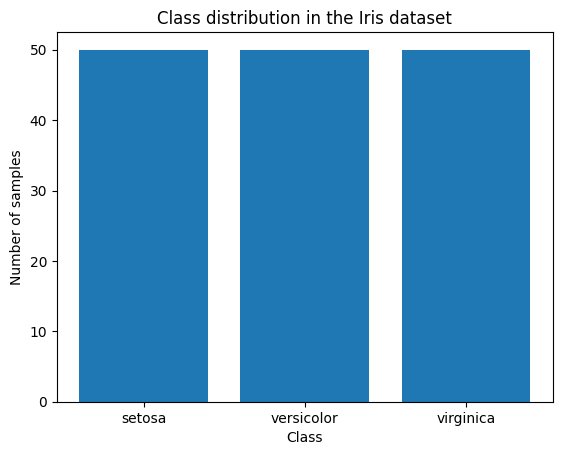

In [4]:
# Visualize how many samples we have per class
class_counts = np.bincount(iris_dataset['target'])

plt.figure()
plt.bar(range(len(class_counts)), class_counts)
plt.xticks(range(len(class_counts)), iris_dataset['target_names'])
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.title("Class distribution in the Iris dataset")
plt.show()

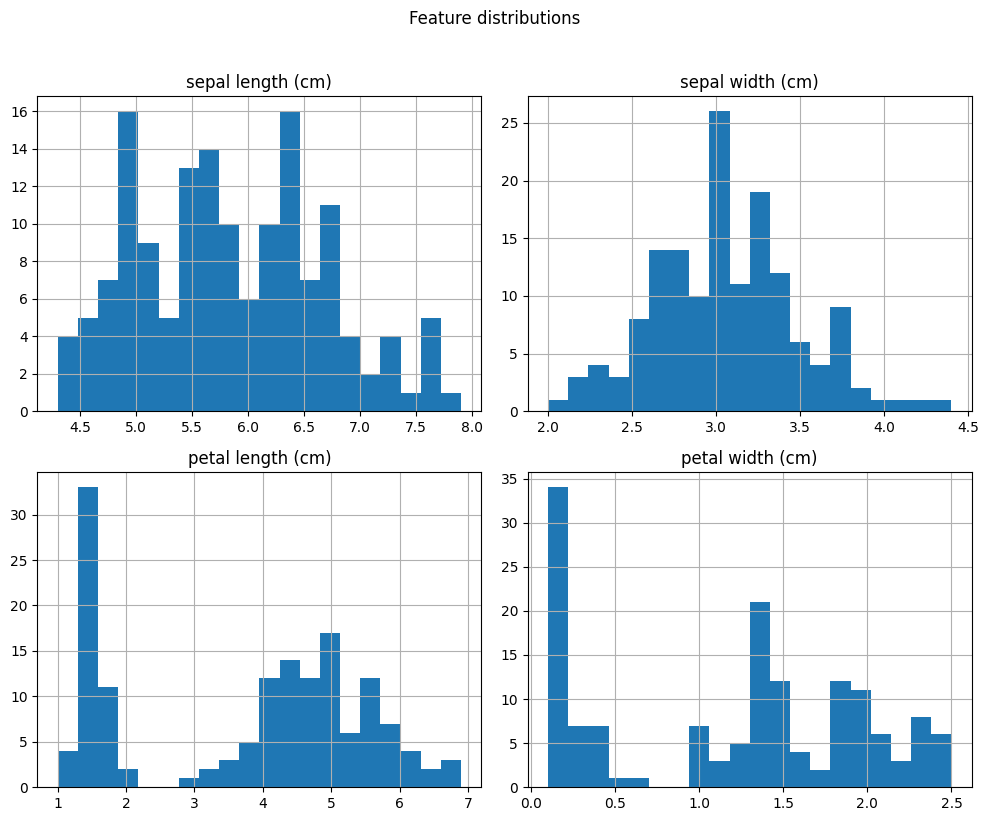

In [5]:
# Plot histograms of each feature to see their distributions
iris_df_full = pd.DataFrame(
    iris_dataset['data'],
    columns=iris_dataset['feature_names']
)

iris_df_full.hist(bins=20, figsize=(10, 8))
plt.suptitle("Feature distributions", y=1.02)
plt.tight_layout()
plt.show()

In [6]:
# Split the dataset into training and test sets
# random_state controls the shuffling; using a fixed value makes results reproducible.
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'],            # feature matrix
    iris_dataset['target'],          # target labels 
    test_size=0.25,                  # 25% of data for testing      
    random_state=0,                  # for reproducibility
    stratify=iris_dataset['target']  # keep class proportions similar in train and test
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (112, 4)
X_test shape: (38, 4)
y_train shape: (112,)
y_test shape: (38,)


In [7]:
# Convert training data to a DataFrame for easier plotting
# pandas DataFrame with feature names as columns
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])

print("iris_dataframe: ", "\n", iris_dataframe, "\n")


iris_dataframe:  
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.0               2.0                3.5               1.0
1                  4.9               3.0                1.4               0.2
2                  4.4               2.9                1.4               0.2
3                  5.0               2.3                3.3               1.0
4                  4.9               2.5                4.5               1.7
..                 ...               ...                ...               ...
107                5.6               3.0                4.5               1.5
108                4.7               3.2                1.6               0.2
109                7.4               2.8                6.1               1.9
110                6.9               3.1                5.1               2.3
111                6.4               2.7                5.3               1.9

[112 rows x 4 columns] 



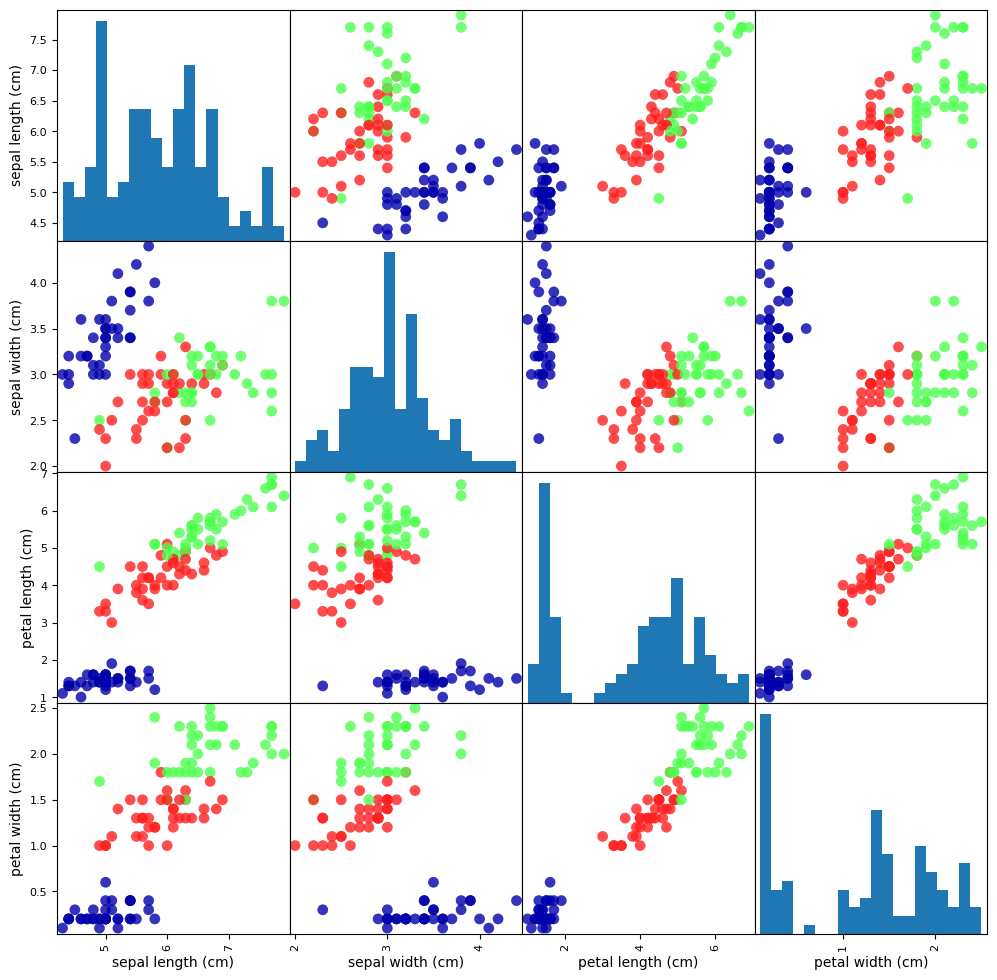

In [8]:
# Create a scatter matrix from the training data
# Each subplot is a projection on a pair of features, colored by the target class.
# This helps visualize relationships between features and class separability.
pd.plotting.scatter_matrix(
    iris_dataframe,         # feature columns for axes
    c=y_train,              # target class labels for coloring  
    figsize=(12, 12),       # size of the figure
    marker='o',             # marker style for points
    hist_kwds={'bins': 20}, # histogram settings for histograms on the diagonal
    s=60,                   # marker size for points
    alpha=.8,               # marker transparency for points
    cmap=mglearn.cm3        # color map for points
);

In [9]:
# Create a k-Nearest Neighbors classifier
# n_neighbors = 1 means each sample is classified by the label of its single closest neighbor.
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model using the training data
knn.fit(X_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Test set accuracy: 0.97


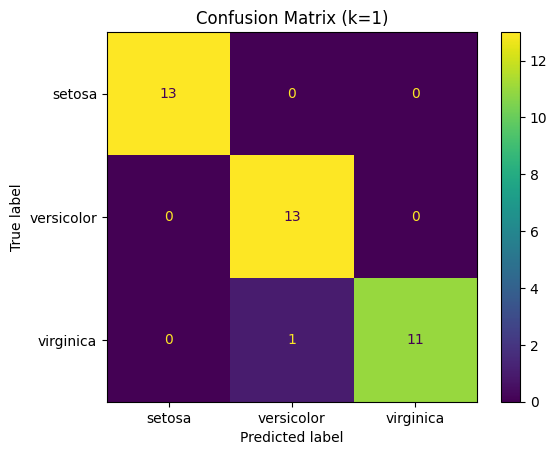

In [10]:
# Predict labels for the test set
# Using the trained k-NN model to predict the classes of the test samples.
y_pred = knn.predict(X_test)

# Compute accuracy as a quick sanity check
# Accuracy is the proportion of correct predictions on the test set.
test_accuracy = knn.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy:.2f}")

# Compute the confusion matrix
# Confusion matrix shows counts of true vs predicted labels for each class.
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

# Display the confusion matrix as a heatmap
# Visual representation of the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=iris_dataset['target_names'])
disp.plot(values_format='d')
plt.title("Confusion Matrix (k=1)")
plt.show()



In [11]:
# Detailed per-class precision, recall, and F1-score
# These metrics provide more insight into the model's performance for each class.
# Precision is the ratio of true positives to the sum of true and false positives.
# Recall is the ratio of true positives to the sum of true positives and false negatives.
# F1-score is the harmonic mean of precision and recall.
print("Classification report:\n")
print(classification_report(
    y_test, y_pred,
    target_names=iris_dataset['target_names']
))

Classification report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [12]:
# Define a new sample using the same feature order as iris_dataset['feature_names']
# [sepal length, sepal width, petal length, petal width]
# Here we create a single sample with specific feature values.
# Note that the input to predict() must be 2D (n_samples, n_features)
# so we wrap the feature list in another list to create a 2D array by using np.array.
X_new = np.array([[5.0, 2.9, 1.0, 0.2]])
print("X_new.shape:", X_new.shape)

# Predict the class of the new sample
prediction = knn.predict(X_new)
print("Prediction (encoded label):", prediction)

# Map encoded label (0, 1, 2) back to the text label
print("Predicted target name:", iris_dataset['target_names'][prediction])

X_new.shape: (1, 4)
Prediction (encoded label): [0]
Predicted target name: ['setosa']


# Evaluating the Model

In [13]:
# Predict labels for the test set
# Using the trained k-NN model to predict the classes of the test samples.
# This step generates the predicted class labels for each sample in the test set.
# The predicted labels are stored in the variable y_pred.
# These predictions will be used to evaluate the model's performance.
y_pred = knn.predict(X_test)
print("Test set predictions:,\n", y_pred, "\n")

# Display the true labels for comparison
print("True labels for the test set:\n", y_test, "\n")

# Check which predictions were correct
# A boolean array indicating correct predictions
# True where prediction matches true label, False otherwise
# This helps identify which samples were classified correctly.
print("Boolean array indicating correct predictions:\n", y_pred == y_test, "\n")

# Compute accuracy as a quick sanity check
# Accuracy is the proportion of correct predictions on the test set.
# This is calculated by taking the mean of the boolean array (True=1, False=0).
# It provides a simple metric to assess overall model performance.
print("Test set scores with boolean array mean: {:.2f}".format(np.mean(y_pred == y_test)))

#  Compute accuracy as a quick sanity check
# Accuracy is the proportion of correct predictions on the test set.
# This is calculated using the model's built-in score() method.
# It provides a simple metric to assess overall model performance.
# The score() method returns the mean accuracy on the given test data and labels.
print("Test set scores with model's score method: {:.2f}".format(knn.score(X_test, y_test)))

Test set predictions:,
 [0 0 0 0 1 1 1 0 1 2 2 2 1 2 1 0 0 2 0 1 2 1 1 0 1 0 0 1 2 1 0 1 2 2 0 1 2
 2] 

True labels for the test set:
 [0 0 0 0 1 1 1 0 1 2 2 2 1 2 1 0 0 2 0 1 2 1 1 0 2 0 0 1 2 1 0 1 2 2 0 1 2
 2] 

Boolean array indicating correct predictions:
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True] 

Test set scores with boolean array mean: 0.97
Test set scores with model's score method: 0.97


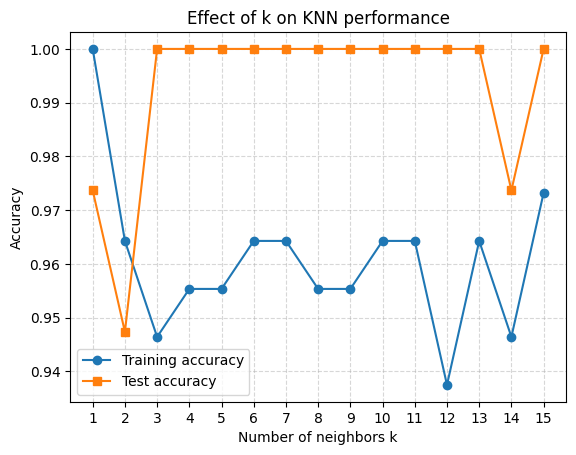

In [14]:
# Explore how the choice of k (number of neighbors) affects performance
# We will vary k from 1 to 15 and record training and test accuracies.
# This helps understand the bias-variance trade-off in k-NN.
# Smaller k values can lead to overfitting (high variance), while larger k values can lead to underfitting (high bias).
k_values = range(1, 16)
train_scores = []
test_scores = []

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    train_scores.append(knn_k.score(X_train, y_train))
    test_scores.append(knn_k.score(X_test, y_test))

plt.figure()
plt.plot(k_values, train_scores, marker='o', label='Training accuracy')
plt.plot(k_values, test_scores, marker='s', label='Test accuracy')
plt.xlabel("Number of neighbors k")
plt.ylabel("Accuracy")
plt.title("Effect of k on KNN performance")
plt.xticks(list(k_values))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

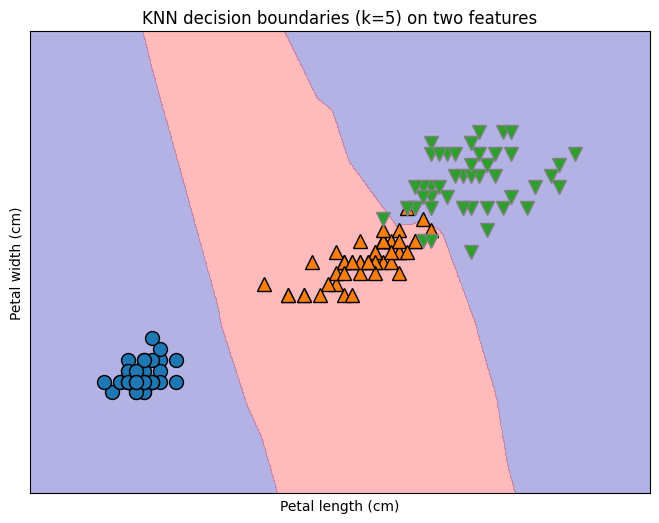

2D model test accuracy: 1.0


In [15]:
# Use only two features for 2D visualization: petal length and petal width
# This allows us to plot decision boundaries in a 2D space.
# We select these features because they provide good class separation visually.
# Petal length and petal width are chosen for their effectiveness in distinguishing iris species.
# These two features allow us to visualize the decision boundaries in a 2D plot.
# This simplification helps in understanding how the k-NN algorithm separates different classes.
X_2d = iris_dataset['data'][:, 2:4]
y = iris_dataset['target']

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, stratify=y, random_state=0
)

# Try k=5 as a slightly smoother classifier in 2D
# This choice of k helps avoid overfitting to noise in the 2D feature space.
# It provides a balance between capturing local structure and generalizing well.
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_2d, y_train_2d)

# Plot decision boundaries using mglearn's helper
plt.figure(figsize=(8, 6))
mglearn.plots.plot_2d_separator(knn_2d, X_2d, fill=True, alpha=.3) # alpha controls transparency
mglearn.discrete_scatter(X_2d[:, 0], X_2d[:, 1], y)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("KNN decision boundaries (k=5) on two features")
plt.show()

print("2D model test accuracy:", knn_2d.score(X_test_2d, y_test_2d))


### Summary

- We explored the Iris dataset (4 features, 3 classes) and inspected feature distributions and class balance.  
- We trained a k-Nearest Neighbors classifier and evaluated it with accuracy, a confusion matrix, and a classification report.  
- We studied how the hyperparameter `k` affects performance by plotting train/test accuracy vs. `k`.  
- Using only petal length and petal width, we visualized the 2D decision boundaries of KNN.

This notebook covers **data exploration**, **model training**, **model evaluation**, and **hyperparameter analysis** for a simple classification problem.
